In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers

Using TensorFlow backend.


In [10]:
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20

In [9]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# model construction
 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())
# 輸出模型摘要資訊
model.summary()

Total Parameters：1250858
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)    

In [8]:
#第三步編譯
'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'''
Example:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
'''

opt = optimizers.SGD(lr=0.01, decay = 1e-6, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Not using data augmentation.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 304s 6ms/step - loss: 1.8569 - acc: 0.3148 - val_loss: 1.4193 - val_acc: 0.4852
Epoch 2/20
50000/50000 [==============================] - 284s 6ms/step - loss: 1.3973 - acc: 0.4917 - val_loss: 1.3048 - val_acc: 0.5390
Epoch 3/20
50000/50000 [==============================] - 291s 6ms/step - loss: 1.2258 - acc: 0.5625 - val_loss: 1.0564 - val_acc: 0.6252
Epoch 4/20
50000/50000 [==============================] - 284s 6ms/step - loss: 1.1047 - acc: 0.6095 - val_loss: 0.9394 - val_acc: 0.6733
Epoch 5/20
50000/50000 [==============================] - 284s 6ms/step - loss: 1.0118 - acc: 0.6454 - val_loss: 0.9010 - val_acc: 0.6859
Epoch 6/20
50000/50000 [==============================] - 285s 6ms/step - loss: 0.9525 - acc: 0.6668 - val_loss: 0.8385 - val_acc: 0.7064
Epoch 7/20
50000/50000 [=====================

In [12]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/vincent/saved_models/keras_cifar10_trained_model_.h5 
10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.7080616303920746
Test accuracy: 0.7603


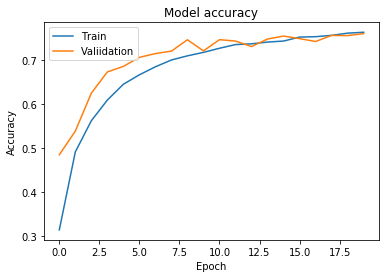

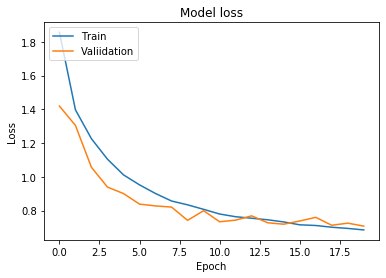

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.savefig("Accuracy_using_SGD.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.savefig("Loss_using_SGD.png")
plt.show()

In [20]:
# model construction
 
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model1.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# change the optimizer 
model1.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 305s 6ms/step - loss: 1.5076 - acc: 0.4513 - val_loss: 1.1391 - val_acc: 0.5937
Epoch 2/5
50000/50000 [==============================] - 318s 6ms/step - loss: 1.1038 - acc: 0.6075 - val_loss: 0.9580 - val_acc: 0.6667
Epoch 3/5
50000/50000 [==============================] - 297s 6ms/step - loss: 0.9534 - acc: 0.6624 - val_loss: 0.8477 - val_acc: 0.7066
Epoch 4/5
50000/50000 [==============================] - 295s 6ms/step - loss: 0.8703 - acc: 0.6958 - val_loss: 0.7614 - val_acc: 0.7331
Epoch 5/5
50000/50000 [==============================] - 296s 6ms/step - loss: 0.8057 - acc: 0.7170 - val_loss: 0.7505 - val_acc: 0.7398


In [22]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/vincent/saved_models/keras_cifar10_trained_model_.h5 
10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.6842821708202362
Test accuracy: 0.7743


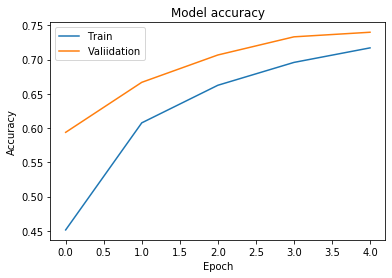

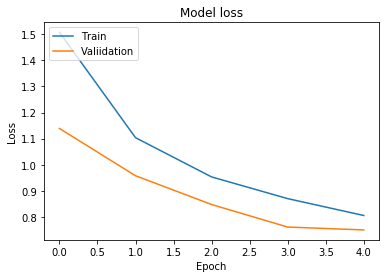

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.savefig("Accuracy_using_Adam.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.savefig("Loss_using_Adam.png")
plt.show()

In [24]:
# model construction
 
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model2.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# change the optimizer 
model2.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 295s 6ms/step - loss: 0.7730 - acc: 0.7290 - val_loss: 0.7227 - val_acc: 0.7498
Epoch 2/5
50000/50000 [==============================] - 295s 6ms/step - loss: 0.7289 - acc: 0.7447 - val_loss: 0.7163 - val_acc: 0.7515
Epoch 3/5
50000/50000 [==============================] - 292s 6ms/step - loss: 0.7092 - acc: 0.7516 - val_loss: 0.6875 - val_acc: 0.7622
Epoch 4/5
50000/50000 [==============================] - 293s 6ms/step - loss: 0.6733 - acc: 0.7635 - val_loss: 0.7077 - val_acc: 0.7614
Epoch 5/5
50000/50000 [==============================] - 294s 6ms/step - loss: 0.6461 - acc: 0.7749 - val_loss: 0.6419 - val_acc: 0.7800


In [26]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/vincent/saved_models/keras_cifar10_trained_model_.h5 
10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.6842821708202362
Test accuracy: 0.7743


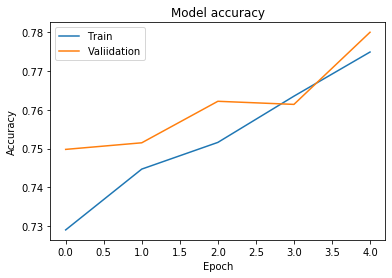

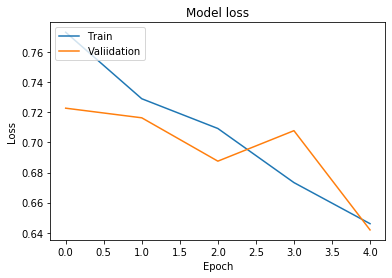

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.savefig("Accuracy_using_RMSprop.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.savefig("Loss_using_RMSprop.png")
plt.show()

In [29]:
# model construction
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model3.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# change the optimizer 
model3.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
# using different epoch and batch size 
if not data_augmentation:
    print('Not using data augmentation.')
    history=model3.fit(x_train, y_train,
              batch_size=64,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 256s 5ms/step - loss: 1.5351 - acc: 0.4358 - val_loss: 1.1690 - val_acc: 0.5837
Epoch 2/10
50000/50000 [==============================] - 258s 5ms/step - loss: 1.1406 - acc: 0.5935 - val_loss: 0.9972 - val_acc: 0.6495
Epoch 3/10
50000/50000 [==============================] - 286s 6ms/step - loss: 0.9692 - acc: 0.6590 - val_loss: 0.8695 - val_acc: 0.6979
Epoch 4/10
50000/50000 [==============================] - 285s 6ms/step - loss: 0.8658 - acc: 0.6959 - val_loss: 0.7668 - val_acc: 0.7298
Epoch 5/10
50000/50000 [==============================] - 283s 6ms/step - loss: 0.7999 - acc: 0.7188 - val_loss: 0.7321 - val_acc: 0.7416
Epoch 6/10
50000/50000 [==============================] - 340s 7ms/step - loss: 0.7502 - acc: 0.7368 - val_loss: 0.7522 - val_acc: 0.7364
Epoch 7/10
50000/50000 [==============================] - 327s 7ms/step - loss: 0.7092 - acc:

Saved trained model at /Users/vincent/saved_models/keras_cifar10_trained_model_.h5 
10000/10000 [==============================] - 13s 1ms/step
Test loss: 0.6842821708202362
Test accuracy: 0.7743


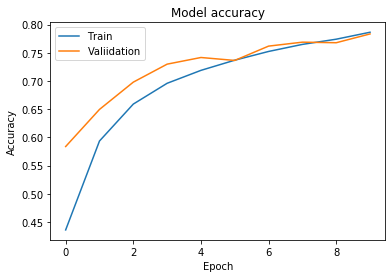

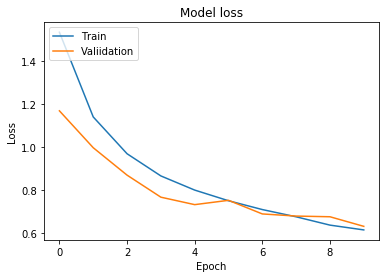

In [32]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
# plt.savefig("Accuracy_using_Adam.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
# plt.savefig("Loss_using_Adam.png")
plt.show()

In [33]:
# model construction
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model4.add(Activation('softmax')) # 最後一層用softmax作為激活函數

# change the optimizer 
model4.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
# using different epoch and batch size 
if not data_augmentation:
    print('Not using data augmentation.')
    history=model4.fit(x_train, y_train,
              batch_size=128,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 255s 5ms/step - loss: 1.6213 - acc: 0.4054 - val_loss: 1.2624 - val_acc: 0.5458
Epoch 2/5
50000/50000 [==============================] - 282s 6ms/step - loss: 1.2241 - acc: 0.5646 - val_loss: 1.0687 - val_acc: 0.6232
Epoch 3/5
50000/50000 [==============================] - 270s 5ms/step - loss: 1.0569 - acc: 0.6242 - val_loss: 0.9188 - val_acc: 0.6742
Epoch 4/5
50000/50000 [==============================] - 243s 5ms/step - loss: 0.9488 - acc: 0.6632 - val_loss: 0.8818 - val_acc: 0.6874
Epoch 5/5
50000/50000 [==============================] - 11192s 224ms/step - loss: 0.8744 - acc: 0.6908 - val_loss: 0.8027 - val_acc: 0.7192


Saved trained model at /Users/vincent/saved_models/keras_cifar10_trained_model_.h5 
10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.8027163957595825
Test accuracy: 0.7192


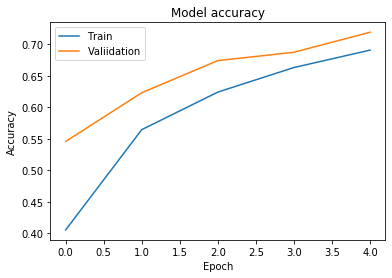

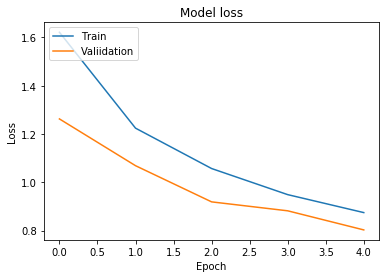

In [35]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model_.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
# plt.savefig("Accuracy_using_Adam.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
# plt.savefig("Loss_using_Adam.png")
plt.show()